# App_reviews scraper and basic analysis

- fetch reviews of an application from play store 
- create a dataframe of the latest 1000 max reviews
- apply basic sentiment analysis with nltk

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

# libraries for the scraper
from google_play_scraper import app, Sort, reviews_all


In [2]:
# get the app_id as in the URL (https://play.google.com/store/apps/details?id='com.Splitwise.SplitwiseMobile')
app_name = "splitwise"
app_id = "com.Splitwise.SplitwiseMobile"

In [3]:
# fetch the reviews from play store
app_reviews = reviews_all(
                            app_id,
                            sleep_milliseconds=0, # defaults to 0
                            lang='en', # defaults to 'en'
                            country='in', # defaults to 'us'
                            sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
                        )

In [6]:
# create the dataframe for the reviews
app_reviews_df = pd.DataFrame(np.array(app_reviews),columns=['content'])
app_reviews_df = app_reviews_df.join(pd.DataFrame(app_reviews_df.pop('content').tolist()))

In [7]:
# get the latest 1000 reviews
app_reviews_df = app_reviews_df.sort_values(by=['at'],ascending=False).head(1000)
app_reviews_df.rename(columns={'content':'review'},inplace=True)

In [8]:
# save the data in a csv file
app_reviews_df.to_csv(f'play_store Reviews of {app_name}.csv')

### Next is the Basic Sentiment Analysis using nltk 

In [9]:
# Importing the libraries
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Binba\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
# Creating a new column 'Compound' which contains the polarity scores
app_reviews_df['Compound'] = app_reviews_df['review'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [11]:
# Creating a new column 'Sentiment' which classifies the polarity scores
app_reviews_df['Sentiment'] = app_reviews_df['Compound'].apply(lambda x: 'Positive' if x >=0 else 'Negative')

In [12]:
# Printing the first 10 rows of the data
print(app_reviews_df.head(10))

# Printing the percentage of positive and negative reviews
print(app_reviews_df['Sentiment'].value_counts(normalize=True) * 100)

                               reviewId            userName  \
0  e456470a-8e88-4d5d-889b-a2cb80eba094        Héctor Pérez   
1  8e90e567-b8d5-454f-8e21-5902b93901f5    muthu thirumaran   
2  34cfe56e-2c6d-45cd-b631-6765d23dd246      Manthan Mirgal   
3  d0653d08-3cc3-4500-8e5b-f1816c9d6616    om prakash dubey   
4  a71fcf02-14df-470c-8bc8-64e88ef40b23        Marcell Tóth   
5  1ad29a6e-8900-4ab0-bbe2-39232da43b99         mohan yadav   
6  3d8d837a-f4fe-4bee-b285-e0107a40364e  rose marie alegado   
7  2b06217e-c0a9-43f2-8f01-18706df39191    Charles Phillips   
8  bfdcdf52-a85f-4703-b5fa-d21656c5bc23  Arjya Bhattacharya   
9  68299d07-87ce-45e2-8c33-3494774198cd        Michael Cook   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/AFdZu...   
1  https://play-lh.googleusercontent.com/a-/AFdZu...   
2  https://play-lh.googleusercontent.com/a-/AFdZu...   
3  https://play-lh.googleusercontent.com/a/AItbvm...   
4  https://play-lh.googleu

<AxesSubplot:>

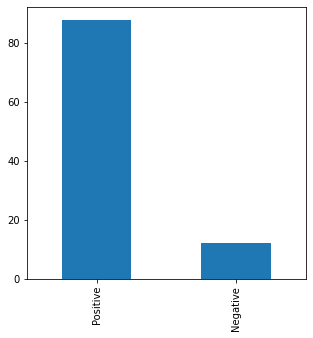

In [13]:
# plot the results of negative and posative reviews
x  = app_reviews_df['Sentiment'].value_counts(normalize=True) * 100

x.plot(kind='bar',figsize=(5,5))

<AxesSubplot:>

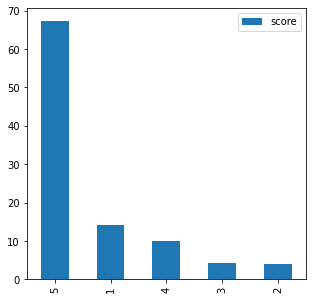

In [14]:
# plot the persentage of stars rating of the app
y = app_reviews_df['score'].value_counts(normalize=True) * 100
y.to_frame().plot(kind='bar',figsize=(5,5))

In [ ]:
# export the dataframe of results to a csv file
app_reviews_df.to_csv(f'play_store Review {app_name} with Sentiment.csv')